In [1]:
from ProwlsControl import ProwlsControl
pc = ProwlsControl()
#pc.laser_toggle_on()


Toptica Connection:
Connected to: DLCsmartTHz
Serial Number: DLC smart_015174
Current User Level: 3

Lock-In Connection:
Stanford_Research_Systems,SR830,s/n46458,ver1.07 


Labjack Connection:
Device type: 7, Connection type: 1,
Serial number: 470035776, IP address: 0.0.0.0, Port: 0,
Max bytes per MB: 64

Power Supply Connection:
Agilent Technologies,E3647A,0,2.4-6.1-2.1



In [ ]:
import time
pc.laser_toggle_on()
ts = time.time()
#pc.scan(119.5,122.5,0.05,ftol=0.001,meas_time=0.01)
pc.multiscan(119.5,122.5,0.05,ftol=0.001,meas_time=0.01,nscans=30*16)
#pc.multiscan(119,121,1,ftol=0.1,meas_time=0.01,nscans=4)
#pc.timestream(140,ftol=0.01,meas_time=5)
pc.laser_toggle_off()

                 Time   Frequency  Lockin X  Lockin Y  Lockin R Lockin Theta  \
0   1754601431.496315  119.498016  0.000015  0.000001  0.000015        2.898   
1   1754601433.981285  119.551217  0.000015  0.000001  0.000015        3.252   
2   1754601435.685791  119.598546  0.000015  0.000001  0.000015        3.192   
3   1754601437.405001  119.643105  0.000015  0.000001  0.000015         2.97   
4   1754601438.993468  119.695955  0.000014  0.000001  0.000014        3.696   
..                ...         ...       ...       ...       ...          ...   
56   1754601527.11667  122.297508   0.00002  0.000001   0.00002        2.376   
57  1754601528.644259   122.34149   0.00002  0.000001   0.00002        2.478   
58  1754601530.480351  122.401621  0.000024  0.000001  0.000024        2.106   
59  1754601532.147254  122.441758  0.000031  0.000001  0.000031        1.326   
60  1754601533.936546  122.497571  0.000038  0.000001  0.000038         1.14   

     Temp pmix Heater Power pmix  
0   

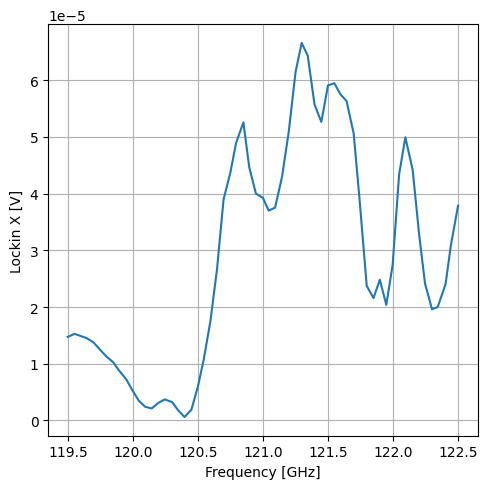

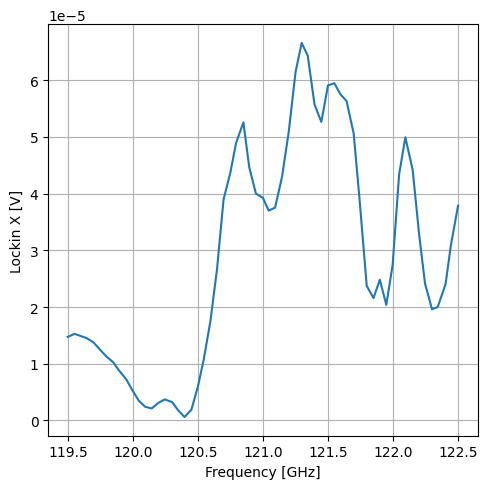

In [8]:
print(pc.scan_data)
pc.plot.plot_scan()

In [ ]:
pc.laser_toggle_off()
pc.close()

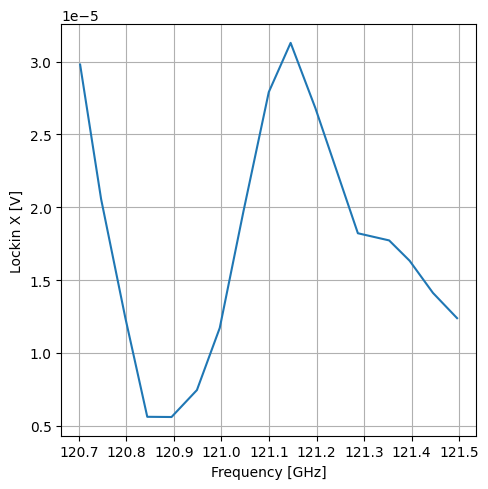

In [1]:
import numpy as np
from ProwlsControl import ProwlsControl
import matplotlib.pyplot as plt
pc = ProwlsControl(connect=False)
pc.io.load_multiscan('..\\Data\\Multiscans\\multiscan_data_27Jul2025.pkl')
#pc.io.load_multiscan('..\\Data\\Multiscans\\multiscan_data_18042025_120000.pkl')
idx = range(200,300)
idx = [5]
fig1 = pc.plot.plot_multiscan(fignum=1,iloc=idx);
#pc.tools.fit_freq_shift(refidx=None,iloc=idx)
#fig2 = pc.plot.plot_multiscan(fignum=2,apply_corr=True,iloc=idx);
pc.tools.collect_multiscan_and_fits()

In [8]:
plt.figure(1)
plt.clf()
plt.plot((pc.multiscan_avg_data['Time'].iloc[0:100]-pc.multiscan_avg_data['Time'].iloc[0])/60,pc.multiscan_avg_data['dF'].iloc[0:100],'.')
pc.multiscan_avg_data['Time'].diff().median()

np.float64(26.903457403182983)

<Figure size 640x480 with 0 Axes>

[5.84135754e-09 0.00000000e+00 1.00000000e+00]


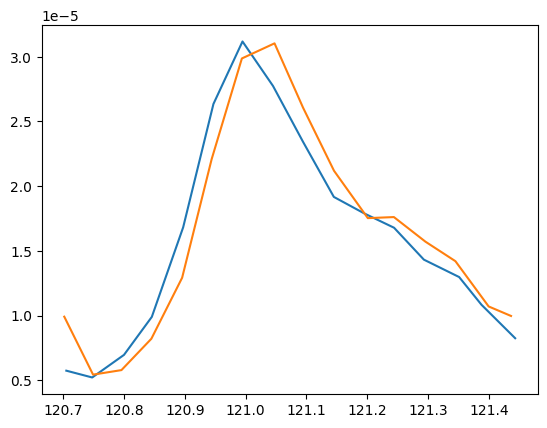

In [2]:
import numpy as np
from scipy.interpolate import interp1d, CubicSpline

idx = 1
freq1 = pc.multiscan_data[0]['Frequency']
spec1 = pc.multiscan_data[0]['Lockin X']
freq2 = pc.multiscan_data[idx]['Frequency']
spec2 = pc.multiscan_data[idx]['Lockin X']
parm = pc.multiscan_corr[idx]
print(parm)
spec_interp = interp1d(freq1,spec2,kind='cubic',bounds_error=False)#,fill_value='extrapolate')
#spec_interp = CubicSpline(freq1,spec2,extrapolate=False)
#parm[0]=0.1
spec2 = (spec_interp(freq1+parm[0])-parm[1])*parm[2]+parm[1]
fidx =  ~np.isnan(spec2)
plt.figure(1)
plt.clf()
plt.plot(freq1[fidx],spec1[fidx])
plt.plot(freq2[fidx],spec2[fidx])

In [8]:
pc.multiscan_data[0]['Frequency']


0     120.704815
1     120.747413
2     120.799716
3     120.845498
4     120.897094
5     120.946901
6     120.994728
7     121.044951
8     121.094152
9      121.14504
10    121.195829
11    121.244117
12    121.293213
13    121.351228
14    121.388014
15    121.443444
16    121.495146
Name: Frequency, dtype: object

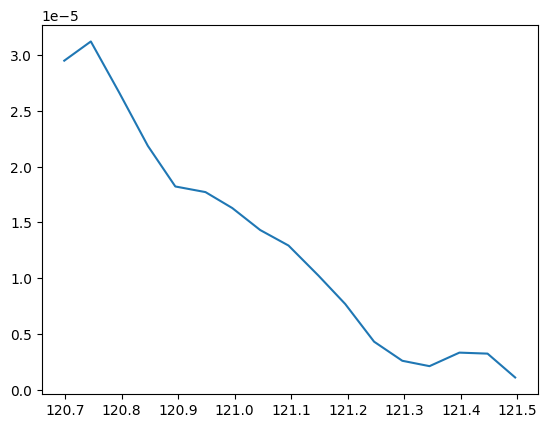

In [3]:

import matplotlib.pyplot as plt
plt.figure()
plt.plot(pc.scan_data['Frequency'],pc.scan_data['Lockin X'])
plt.show()